# Day 28: Introduction to Support Vector Machines (SVM)

Support Vector Machines (SVM) stand as a powerful and versatile method used in the field of machine learning and data science. Developed initially for classification tasks, SVM has been extended to tackle regression problems as well, showcasing its adaptability and strength in handling diverse data types and structures.

## What is Support Vector Machine (SVM)?

### Definition
At its core, a Support Vector Machine is a supervised learning algorithm that can classify data into two or more categories. It achieves this by finding the optimal hyperplane which best separates the data points of different classes. In cases where data is linearly separable, SVM seeks a hyperplane with the maximum margin between the nearest points (support vectors) of the classes.

The equation of a hyperplane in a two-dimensional space can be represented as $wx - b = 0$, where:

- $w$ is the weight vector,
- $x$ is the input features, and
- $b$ is the bias.

For nonlinearly separable data, SVM utilizes the kernel trick to map the input space into a higher-dimensional space where a hyperplane can effectively separate the classes.

### Importance
The true power of SVM lies in its capability to work effectively on both linear and nonlinear data, making it exceptionally versatile in the realm of classification and regression tasks. Its reliance on support vectors means it is not heavily affected by outliers, and it can handle high-dimensional data efficiently.

The hinge loss function, an integral part of SVM's optimization problem, further embodies its robustness. It is formulated as $\max(0, 1 - y_i(w \cdot x_i - b))$, where $y_i$ is the label of the $i^{th}$ data point, maximizing the margin between different classes while penalizing misclassifications.

## Applications and Examples

SVM's flexibility and efficacy find applications across a vast array of fields:

- **Bioinformatics:** From classifying proteins to predicting gene expression patterns, SVM helps in understanding complex biological processes.

- **Image Recognition:** SVM can classify images by recognizing patterns and features, playing a crucial role in facial recognition technology and medical imaging analysis.

- **Natural Language Processing (NLP):** It aids in sentiment analysis, categorization of news articles, and spam detection by understanding and classifying text.

The adaptability of SVM, along with its sound mathematical foundation, ensures its position as a cornerstone algorithm in the machine learning landscape, addressing problems ranging from straightforward to highly intricate tasks across multidisciplinary fields.


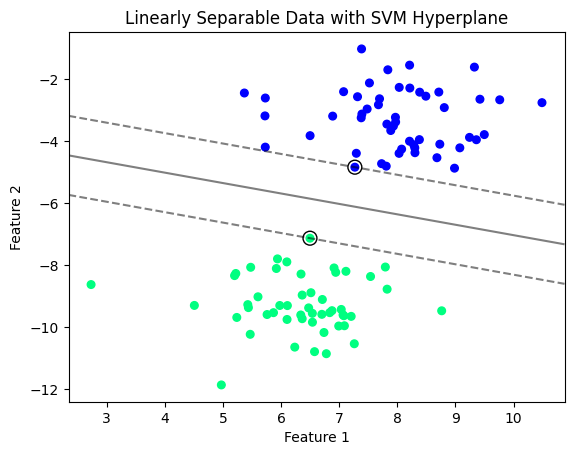

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

# Generate a toy dataset: 2 classes, linearly separable
X, y = make_blobs(n_samples=100, centers=2, random_state=6)

# Fit the SVM model
model = SVC(kernel='linear', C=1E10)  # High C implies we want no misclassification
model.fit(X, y)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='winter')

# Plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Highlight the support vectors
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linearly Separable Data with SVM Hyperplane')
plt.show()

# Interpretation:
# This plot demonstrates how SVM classifies a linearly separable dataset by finding the optimal hyperplane.
# The solid line represents the hyperplane (the decision boundary), while the dashed lines mark the margin.
# The points circled in black are the support vectors, indicating the nearest points to the hyperplane,
# which maximally separate the two classes.



## In Higher Dimensions

Remember, to think like a data scientist, you have to be prepared to tack on an extra dimension to spatially visualize the data and how to classify or divide it. SVMs divide the data with a hyperplane, which means we can divide three dimensional (or higher) data into separate volumes.

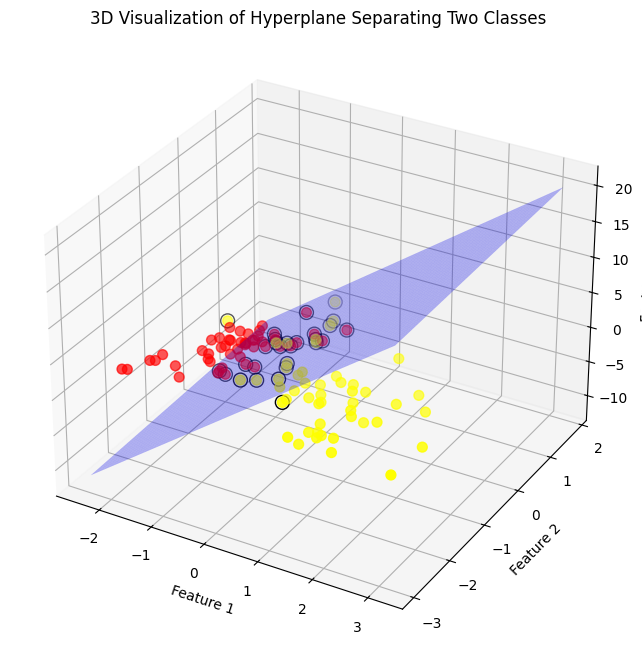

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC
from sklearn.datasets import make_classification

# Generate synthetic data for visualization
X, y = make_classification(n_features=3, n_redundant=0, n_informative=3, n_clusters_per_class=1, n_classes=2)

# Fit SVM model on the synthetic data
model = SVC(kernel='linear')
model.fit(X, y)

# Coefficients for the hyperplane equation
w = model.coef_[0]
b = model.intercept_[0]

# Function to draw hyperplane and margins in 3D feature space
def plot_hyperplane_3D(X, y, w, b, ax):
    # Plot the datapoints
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, s=50, cmap='autumn')
    
    # Generate grid for hyperplane
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    zlim = ax.get_zlim()
    
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    zz = (-w[0] * xx - w[1] * yy - b) * 1. / w[2]
    
    # Plot hyperplane
    ax.plot_surface(xx, yy, zz, color='b', alpha=0.3)
    
    # Plot support vectors
    ax.scatter(model.support_vectors_[:, 0], 
               model.support_vectors_[:, 1], 
               model.support_vectors_[:, 2], 
               s=100, linewidth=1, facecolors='none', edgecolors='k')

# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

plot_hyperplane_3D(X, y, w, b, ax)

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.title('3D Visualization of Hyperplane Separating Two Classes')
plt.show()

# Interpretation:
# The 3D plot visualizes a hyperplane separating two classes in a three-dimensional feature space. 
# The support vectors are highlighted with black circles, emphasizing their role in determining the hyperplane. 
# The transparent blue plane represents the hyperplane, maximally separating the two classes (red and yellow points).



# SVM for Linearly Separable Data

Support Vector Machine (SVM) is a powerful and versatile supervised machine learning algorithm used for both classification and regression tasks. However, it is most widely recognized for its application in classification problems. When it comes to working with data that is linearly separable, SVM shines by finding the optimal hyperplane that separates the different classes with the maximum margin. This section delves into the underlying principles of SVM when dealing with linearly separable data, focusing on the selection of support vectors for margin maximization, the mathematical formulation of the hinge loss function, and an introduction to the Sequential Minimal Optimization (SMO) algorithm.

## Definition

An SVM algorithm seeks to find the hyperplane that separates the classes of data with the largest possible margin. The support vectors are the closest data points to the hyperplane, and the distance between the support vectors and the hyperplane is the margin. For linearly separable data, the goal is to maximize this margin. 

The hinge loss function, pivotal in calculating the SVM decision function, is mathematically represented as:

$$L(y_i, \boldsymbol{x}_i; \boldsymbol{w}, b) = \max(0, 1 - y_i(\boldsymbol{w}\cdot\boldsymbol{x}_i + b))$$

where:
- $y_i$ is the target class (either -1 or 1)
- $\boldsymbol{x}_i$ is the feature vector
- $\boldsymbol{w}$ is the weight vector
- $b$ is the bias

The Sequential Minimal Optimization (SMO) algorithm is used to solve the optimization problem efficiently by breaking it down into 2-dimensional sub-problems that are solved analytically, which significantly reduces the complexity of the optimization process.


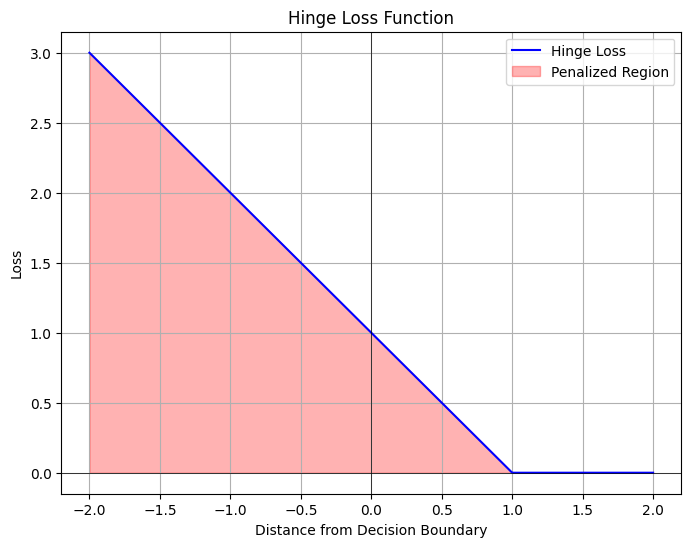

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a range of values (distance from the decision boundary)
x = np.linspace(-2, 2, 400)

# Compute the hinge loss for each value
# Here, the hinge loss is max(0, 1 - x) since y_i(w.x_i+b) simplifies to just the distance from the margin for this visualization
hinge_loss = np.where(1 - x < 0, 0, 1 - x)

# Visualization
plt.figure(figsize=(8, 6))
plt.plot(x, hinge_loss, label='Hinge Loss', color='blue')
plt.title('Hinge Loss Function')
plt.xlabel('Distance from Decision Boundary')
plt.ylabel('Loss')
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.fill_between(x, hinge_loss, 0, where=(x<1), color='red', alpha=0.3, label='Penalized Region')
plt.legend()
plt.show()

#Interpretation: The plot demonstrates how the hinge loss function operates.
#Loss is 0 for any point located on the correct side of the margin (distance >= 1).
#However, points on the wrong side of the margin (distance < 1), or correctly classified but within the margin, are 
#penalized linearly based on how far they are from the margin. This visualization helps understand how SVM focuses on 
#the points near or on the wrong side of the decision boundary and tries to minimize this loss, contributing to 
#maximizing the margin between classes.



# SVM for Nonlinearly Separable Data

Support Vector Machines (SVM) are a powerful and versatile class of supervised learning algorithms used for classification, regression, and outlier detection. When dealing with linearly separable data, SVMs can efficiently create a hyperplane that categorically separates different classes. However, real-world datasets often exhibit complex, nonlinear structures that cannot be easily separated by a straight line or a flat hyperplane. This section delves into handling nonlinearly separable data with SVMs, with a focus on the kernel trick, various kernels, and their implementation.

## What is the Kernel Trick?

**Text:** The kernel trick is an ingenious solution that allows Support Vector Machines to operate in a high-dimensional space without explicitly computing the coordinates of data points in that space. This approach effectively enables the SVM algorithm to find separable hyperplanes in a higher-dimensional space, making it possible to deal with nonlinearly separable datasets.

**Definition:** The kernel trick involves transforming the original feature space into a higher-dimensional space using a kernel function. Mathematically, it can be defined as a function $\kappa(x_i, x_j)$ that computes the dot product of the vectors $\phi(x_i)$ and $\phi(x_j)$ in a high-dimensional space, where $\phi()$ is the transformation function. The beauty of the kernel trick lies in its ability to perform this computation without explicitly mapping data points to this high-dimensional space.

**Importance:** The kernel trick is crucial for extending the applicability of SVMs to nonlinear datasets. It allows SVMs to construct nonlinear decision boundaries by implicitly working in a higher-dimensional feature space. This capability significantly enhances the versatility and effectiveness of SVM algorithms in handling a wide variety of complex, real-world datasets across multiple domains, including image and speech recognition, bioinformatics, and text categorization.

## Applications and Examples

### Polynomial Kernel
The polynomial kernel allows for the modeling of the interaction between features in the dataset. It is given by the equation:
\[ \kappa(x_i, x_j) = (\gamma x_i^\intercal x_j + r)^d \]
where $d$ is the degree of the polynomial, $\gamma$ is a scale factor, and $r$ is a coefficient term. This kernel is particularly useful for datasets where the relationship between classes is not only nonlinear but also involves interactions of features.

### Radial Basis Function (RBF) Kernel
The RBF kernel, also known as the Gaussian kernel, maps samples into a higher-dimensional space using the equation:
\[ \kappa(x_i, x_j) = \exp(-\gamma ||x_i - x_j||^2) \]
where $||x_i - x_j||^2$ is the squared Euclidean distance between two feature vectors, and $\gamma$ is a parameter that controls the width of the Gaussian kernel. The RBF kernel is highly versatile and effective in creating complex decision boundaries, making it a popular choice for many nonlinear SVM problems.

### Sigmoid Kernel
The sigmoid kernel, inspired by neural networks, is defined as:
\[ \kappa(x_i, x_j) = \tanh(\gamma x_i^\intercal x_j + r) \]
where $\gamma$ is the scale parameter, and $r$ is the intercept term. This kernel mimics the behavior of neurons and is particularly interesting for certain types of nonlinear problems.

Implementing nonlinear SVM using scikit-learn in Python involves selecting an appropriate kernel and tuning its parameters such as $\gamma$ and $C$, the penalty parameter. One must also carefully perform cross-validation to select the model that best generalizes to unseen data. The choice of kernel and its parameters significantly affects the model's accuracy and generalization ability, underscoring the importance of a thoughtful approach to parameter tuning and model evaluation in the SVM learning process.


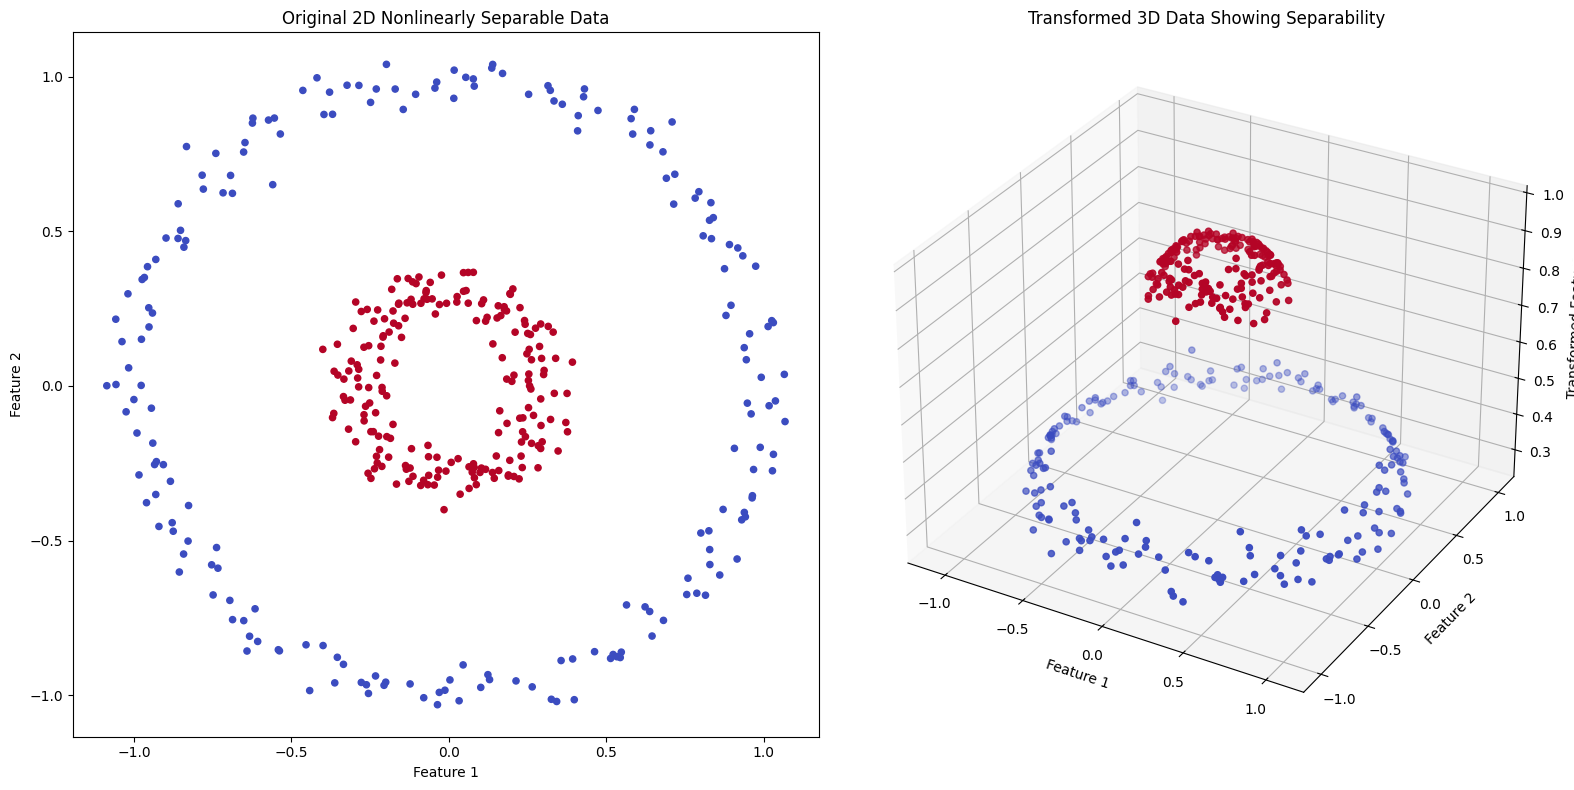

In [5]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D

# Generating a 2D dataset that is nonlinearly separable
X, y = make_circles(n_samples=400, factor=.3, noise=.05)

# SVM with the RBF kernel
svc = SVC(kernel='rbf')
svc.fit(X, y)

# Transforming the data into a higher-dimensional space (3D) using RBF kernel transformation conceptually
# For visualization purposes, we manually create a transformation that emulates the RBF effect
# by adding a third dimension based on the distance from the origin point
R = np.exp(-(X ** 2).sum(1))

# Data visualization
fig = plt.figure(figsize=(16, 8))

# Original 2D data visualization
ax = fig.add_subplot(1, 2, 1)
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=20)
ax.set_title("Original 2D Nonlinearly Separable Data")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")

# 3D transformed data visualization
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], R, c=y, cmap='coolwarm', s=20)
ax.set_title("Transformed 3D Data Showing Separability")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Transformed Feature")
plt.tight_layout()
plt.show()

# Interpretation:
# The left plot shows the original 2D data that is not linearly separable. In the right plot,
# a conceptual kernel transformation is applied, adding a third dimension based on the distance from the origin,
# which makes the data linearly separable in this higher-dimensional space. This demonstrates how kernels
# like RBF can help SVM handle nonlinearly separable data by implicitly transforming it into a higher-dimensional space.



# Exercise For The Reader

## Task 1: Linear SVM with a Toy Dataset

1. **Dataset:** Begin with a simple 2D dataset (for easier visualization and understanding) where the data points linearly separable.
2. **Implementation:** Utilize libraries such as scikit-learn in Python to simplify the SVM model's implementation. Use `SVC` with the `linear` kernel.
3. **Model Tuning:** Adjust the `C` parameter, which controls the margin hardness and the trade-off between correct classification and a maximally large decision boundary.

## Task 2: Non-Linear SVM Using Kernel Trick

1. **Kernel Selection:** Explore different kernel options available (e.g., Polynomial, Radial Basis Function (RBF), Sigmoid) and select the one that best fits the non-linearly separable dataset.
2. **Hyperparameter Tuning:** Besides choosing the kernel, you’re also invited to tune its parameters (like `degree` for polynomial, `gamma` for RBF) and the regularization parameter `C`.
3. **Cross-Validation:** Apply cross-validation (e.g., k-fold cross-validation) to assess the model's performance accurately. This technique is crucial for avoiding overfitting and ensuring that the model generalizes well to unseen data.

**Note:** Remember, the goal of these exercises is not just to build a model that classifies the training data well. The real challenge lies in developing a model that performs well on data it hasn't seen before. Keep this in mind as you select kernels, adjust parameters, and evaluate your models.

Happy coding, and may your model's accuracy be high!


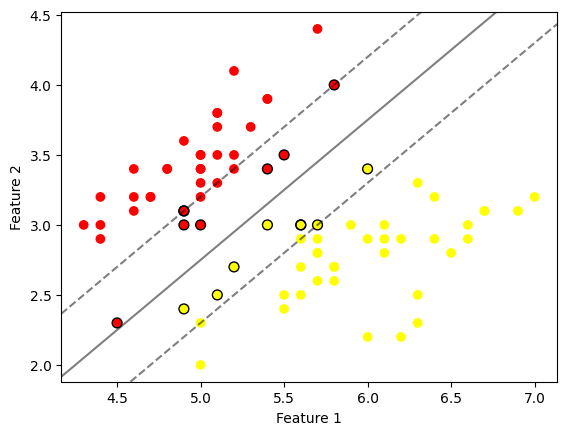

In [8]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

# Load a toy dataset
# For instance, using the iris dataset and selecting only two classes for simplicity
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use the first two features for easier visualization
y = iris.target

# Filter to include only two classes (binary classification problem)
mask = y < 2  # Create a mask for the classes you want to keep
X = X[mask]
y = y[mask]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implementing a basic linear SVM model
svc_linear = SVC(kernel='linear', C=1.0)  # Adjust C for margin hardness
svc_linear.fit(X_train, y_train)

# Visualization of the decision boundary
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a two-dimensional SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # Plot decision boundary and margins
    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # Plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=50, linewidth=1, facecolors='none', edgecolors='k')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

# Plotting the data and the decision boundary
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='autumn')
plot_svc_decision_function(svc_linear)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Suggesting points for modifying the code
# For non-linear kernels, replace 'linear' with 'poly', 'rbf', or 'sigmoid' in SVC
# For example: svc_poly = SVC(kernel='poly', degree=3, C=1.0)
# Remember to also experiment with the 'C', 'degree' (for the polynomial kernel),
# and 'gamma' (for the rbf kernel) parameters for optimal performance.

# Example of model evaluation
# plot_confusion_matrix(svc_linear, X_test, y_test)  # Uncomment to evaluate model
# plt.show()

# Note: For comprehensive evaluation and hyperparameter tuning, consider using
# GridSearchCV or RandomizedSearchCV with cross-validation.

